## Update a wflow model: landuse

Once you have a **Wflow** model, you may want to update your model in order to use a new landuse map, change a parameter value, add sample locations, use different forcing data, create and run different scenarios etc.

With HydroMT, you can easily read your model and update one or several components of your model using the **update** function of the command line interface (CLI). Here are the steps and some examples on how to **update the landuse map and parameters**.

All lines in this notebook which starts with ! are executed from the command line. Within the notebook environment the logging messages are shown after completion. You can also copy these lines and paste them in your shell to get more direct feedback.

### Import packages

In this notebook, we will use some functions of HydroMT to check available datasets and also to plot the landuse maps from the original and updated models. Here are the libraries to import to realize these steps.

In [1]:
import numpy as np
import pandas as pd
import hydromt
from hydromt_wflow import WflowModel

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

proj = ccrs.PlateCarree()  # plot projection

### Searching the data catalog for landuse

In our previous notebook, we built a wflow model using the *GlobCover* landuse classification. But we could as well have chosen another one. Let's what other landuse landcover data are available in HydroMT and choose another landuse classification for our model. For this we will open the data catalog.

You can also directly open and search the HydroMT yaml library by downloading and opening the data_catalog.yml file in [hydromt-artifacts](https://github.com/DirkEilander/hydromt-artifacts/releases/tag/v0.0.3) or look at the list of data sources in the [documentation](https://deltares.github.io/hydromt/latest/user_guide/data.html#available-global-datasets).

In [2]:
# Load the default data catalog of HydroMT
data_catalog = hydromt.DataCatalog()

In [3]:
# Check which landuse/lancover sources are available in the DataCatalog
data_table = data_catalog.to_dataframe()
data_table.source_url[data_table["category"] == "landuse & landcover"]

corine       https://land.copernicus.eu/pan-european/corine...
globcover          http://due.esrin.esa.int/page_globcover.php
modis_lai       https://lpdaac.usgs.gov/products/mcd15a3hv006/
simard       https://webmap.ornl.gov/ogc/dataset.jsp?ds_id=...
vito             https://land.copernicus.eu/global/products/lc
Name: source_url, dtype: object

Here we can see that we have five data sources in HydroMT related to landuse & landcover properties. Out of these, three are landuse classifications:

- **globcover** (already used in our current model)
- **corine**
- **vito**

The other datasets include a Leaf Area Index dataset (modis_lai) and a canopy height dataset (simard).

Let's now see how to update our current model in one command line to use the **corine** classification.

### hydroMT CLI update interface

Using the `hydroMT build` API, we can update one or several components of an already existing Wflow model. Let's get an overview of the available options:

In [4]:
# Print the options available from the update command
! hydromt update --help

Usage: hydromt update [OPTIONS] MODEL MODEL_ROOT

  Update a specific component of a model. Set an output directory to copy the
  edited model to a new folder, otherwise maps are overwritten.

  Example usage:
  --------------

  Update (overwrite) landuse-landcover maps in a wflow model
  hydromt update wflow /path/to/model_root -c setup_lulcmaps --opt source_name=vito

  Update reservoir maps based on default settings in a wflow model and write to new directory
  hydromt update wflow /path/to/model_root -o /path/to/model_out -c setup_reservoirs

Options:
  -o, --model-out DIRECTORY  Output model folder. Maps in MODEL_ROOT are
                             overwritten if left empty.
  -c, --components TEXT      Model components from ini file to run
  --opt TEXT                 Component specific keyword arguments, see the
                             setup_<component> method of the specific model
                             for more information about the arguments.
  -i, --config PATH

### Update wflow landuse layers

In [5]:
# NOTE: copy this line (without !) to your shell for more direct feedback
! hydromt update wflow wflow_piave_subbasin -o ./wflow_piave_corine -c setup_lulcmaps --opt lulc_fn=corine -v

2022-01-27 12:42:32,995 - update - log - INFO - HydroMT version: 0.4.5.dev
2022-01-27 12:42:32,995 - update - main - INFO - Updating wflow model at /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_subbasin (r).
2022-01-27 12:42:32,995 - update - main - INFO - Output dir: /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_corine
2022-01-27 12:42:32,995 - update - main - INFO - User settings:
2022-01-27 12:42:33,001 - update - model_api - INFO - Initializing wflow model from hydromt_wflow (v0.1.4.dev0).
2022-01-27 12:42:33,003 - update - wflow - INFO - Read staticmaps from /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_subbasin/staticmaps.nc


2022-01-27 12:42:33,071 - update - wflow - INFO - Reading model intbl files.
2022-01-27 12:42:33,071 - update - wflow - INFO - Reading model staticgeom files.


2022-01-27 12:42:33,139 - update - wflow - INFO - Read forcing from /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_subbasin/inmaps.nc
2022-01-27 12:42:33,147 - update - wflow - INFO - Model read
2022-01-27 12:42:33,151 - update - model_api - INFO - setup_lulcmaps.lulc_fn: corine
2022-01-27 12:42:33,151 - update - model_api - INFO - setup_lulcmaps.lulc_mapping_fn: None
2022-01-27 12:42:33,151 - update - model_api - INFO - setup_lulcmaps.lulc_vars: ['landuse', 'Kext', 'N', 'PathFrac', 'RootingDepth', 'Sl', 'Swood', 'WaterFrac']
2022-01-27 12:42:33,151 - update - wflow - INFO - Preparing LULC parameter maps.
2022-01-27 12:42:33,154 - update - data_adapter - INFO - Adding sample data v0.0.6 from artifacts


2022-01-27 12:42:33,213 - update - data_adapter - INFO - DataCatalog: Getting corine RasterDataset raster data from /home/runner/.hydromt_data/data/v0.0.6/corine.tif


2022-01-27 12:42:33,310 - update - landuse - INFO - Deriving landuse using nearest resampling (nodata=999).


2022-01-27 12:42:33,488 - update - landuse - INFO - Deriving Kext using average resampling (nodata=-999.0).


2022-01-27 12:42:33,657 - update - landuse - INFO - Deriving N using average resampling (nodata=-999.0).


2022-01-27 12:42:33,826 - update - landuse - INFO - Deriving PathFrac using average resampling (nodata=-999.0).


2022-01-27 12:42:33,996 - update - landuse - INFO - Deriving RootingDepth using average resampling (nodata=-999.0).


2022-01-27 12:42:34,165 - update - landuse - INFO - Deriving Sl using average resampling (nodata=-999.0).


2022-01-27 12:42:34,334 - update - landuse - INFO - Deriving Swood using average resampling (nodata=-999.0).


2022-01-27 12:42:34,502 - update - landuse - INFO - Deriving WaterFrac using average resampling (nodata=-999.0).


2022-01-27 12:42:34,693 - update - wflow - INFO - Write model data to /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_corine
2022-01-27 12:42:34,694 - update - model_api - INFO - Writing model config to /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_corine/wflow_sbm.toml
2022-01-27 12:42:34,695 - update - wflow - INFO - Write staticmaps to /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_corine/staticmaps.nc


2022-01-27 12:42:35,086 - update - wflow - INFO - Writing model staticgeom to file.


2022-01-27 12:42:35,228 - update - wflow - INFO - Write forcing file
2022-01-27 12:42:35,240 - update - wflow - INFO - Process forcing; saving to /home/runner/work/hydromt_wflow/hydromt_wflow/docs/examples/examples/wflow_piave_corine/inmaps.nc
[                                        ] | 0% Completed |  0.0s

[########################################] | 100% Completed |  0.1s


The example above means the following: run **hydromt** with:

- `update wflow`: i.e. update a wflow model
- `wflow_piave_subbasin`: original model folder
- `-o ./wflow_piave_corine`: output updated model folder
- `-c setup_lulcmaps`: model component to update, here setup_lulcmaps for landuse layers
- `--opt lulc_fn=corine`: arguments to use when updating the setup_lulcmaps component, all options are described in the [docs(model_components)](https://deltares.github.io/hydromt_wflow/latest/user_guide/wflow/components.html)
- `v`: give some extra verbosity (2 * v) to display feedback on screen. Now debug messages are provided.

### Model comparison

From the information above, you can see that not only was the landuse map updated but also all wflow landuse-related parameters with it: Kext, N, PathFrac, RootingDepth, Sl, Swood and WaterFrac.

Let's now have a look at the different landuse maps of our two models and check that they were indeed updated.

In [6]:
# Load both models with hydromt
mod0 = WflowModel(root="wflow_piave_subbasin", mode="r")
mod1 = WflowModel(root="wflow_piave_corine", mode="r")

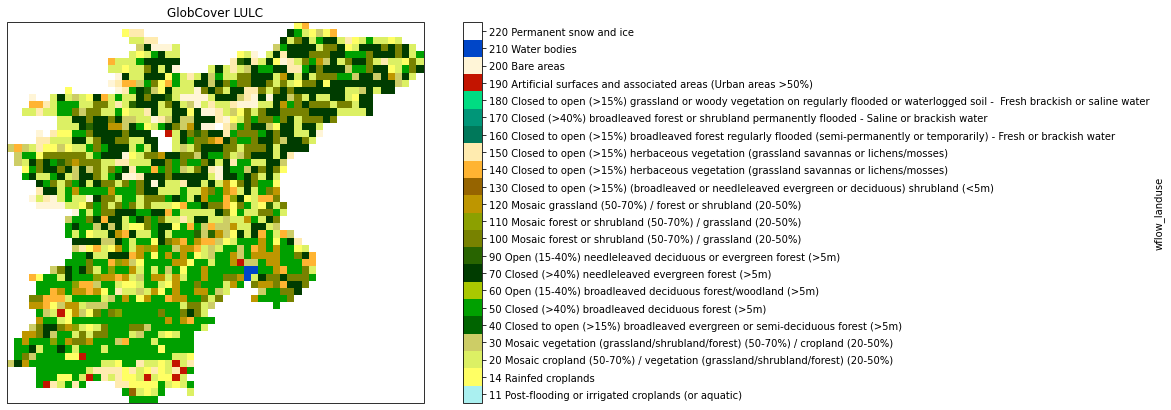

In [7]:
df = pd.read_csv("./legends/GLOBCOVER_2009_QGIS.txt", header=None, index_col=0)

# plot  globcover map
levels = df.index
colors = (df.iloc[:-1, :4] / 255).values
ticklabs = df.iloc[:-1, 4].values
cmap, norm = mpl.colors.from_levels_and_colors(levels, colors)
ticks = np.array(levels[:-1]) + np.diff(levels) / 2.0

# create new figure
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(projection=proj)
# plot globcover landuse
mask = mod0.staticmaps["wflow_subcatch"] > 0
p = (
    mod0.staticmaps["wflow_landuse"]
    .raster.mask_nodata()
    .plot(ax=ax, cmap=cmap, norm=norm, cbar_kwargs=dict(ticks=ticks))
)
p.axes.set_title("GlobCover LULC")
_ = p.colorbar.ax.set_yticklabels(ticklabs)

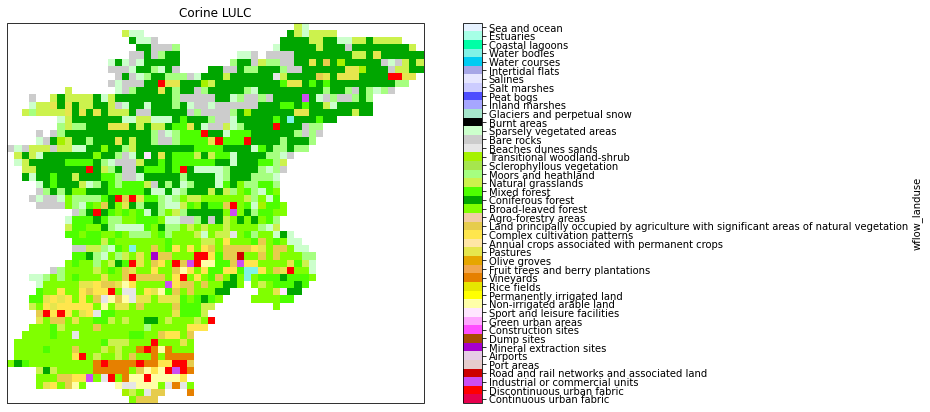

In [8]:
# plot  corine map
df = pd.read_csv(
    "./legends/CLC2018_CLC2018_V2018_20_QGIS.txt", header=None, index_col=0
)

# plot  globcover map
levels = df.index
colors = (df.iloc[:-1, :4] / 255).values
ticklabs = df.iloc[:-1, 4].values
cmap, norm = mpl.colors.from_levels_and_colors(levels, colors)
ticks = np.array(levels[:-1]) + np.diff(levels) / 2.0

# create new figure
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(projection=proj)
# plot corine landuse
p = (
    mod1.staticmaps["wflow_landuse"]
    .raster.mask_nodata()
    .plot(ax=ax, cmap=cmap, norm=norm, cbar_kwargs=dict(ticks=ticks))
)
p.axes.set_title("Corine LULC")
_ = p.colorbar.ax.set_yticklabels(ticklabs)